In [276]:
import pandas as pd
import numpy as np

## Datasets inspection

Salary data:

In [277]:
salary_df = pd.read_csv("cities_avgsal.csv")

In [278]:
salary_df.head()

,City,Country,Net Salary (After Tax)
0,Zurich,Switzerland,8181.35
1,Geneva,Switzerland,7496.77
2,Copenhagen,Denmark,4752.58
3,Oslo,Norway,3893.72
4,Gothenburg,Sweden,3849.44


In [279]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    110 non-null    object 
 1   Country                 110 non-null    object 
 2   Net Salary (After Tax)  110 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


Price data:

In [280]:
prices_df = pd.read_csv("prices.csv")

In [281]:
prices_df.head()

,City,Country,Category,Item Name,Min Local,Avg Local,Max Local,Currency,Min USD,Avg USD,Max USD
0,London,United Kingdom,Markets,"Apples, 1 kg",0.74,2.06,3.63,GBP,0.99,2.76,4.87
1,London,United Kingdom,Markets,"Banana, 1 kg",0.72,1.18,2.98,GBP,0.97,1.58,4.00
2,London,United Kingdom,Markets,"Beef Round or Equivalent Back Leg Red Meat, 1 kg",4.97,9.55,14.91,GBP,6.67,12.81,20.01
3,London,United Kingdom,Markets,"Bottle of Wine, Mid-Range Price",5.96,7.95,11.93,GBP,8.00,10.67,16.01
4,London,United Kingdom,Markets,"Chicken Breasts, Boneless and Skinless, 1 kg",3.43,6.08,8.94,GBP,4.60,8.16,12.00


In [282]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2524 non-null   object 
 1   Country    2524 non-null   object 
 2   Category   2524 non-null   object 
 3   Item Name  2524 non-null   object 
 4   Min Local  2524 non-null   float64
 5   Avg Local  2524 non-null   float64
 6   Max Local  2524 non-null   float64
 7   Currency   2524 non-null   object 
 8   Min USD    2524 non-null   float64
 9   Avg USD    2524 non-null   float64
 10  Max USD    2524 non-null   float64
dtypes: float64(6), object(5)
memory usage: 217.0+ KB


In [283]:
prices_df["Item Name"].unique()

array(['Apples, 1 kg', 'Banana, 1 kg',
       'Beef Round or Equivalent Back Leg Red Meat, 1 kg ',
       'Bottle of Wine, Mid-Range Price',
       'Chicken Breasts, Boneless and Skinless, 1 kg',
       'Domestic Beer, 0.5 liter Bottle', 'Eggs, 12 pack',
       'Lettuce, 1 head', 'Loaf of Fresh White Bread, 0.5 kg',
       'Local Cheese, 1 kg', 'Milk, Regular,1 liter', 'Onion, 1 kg',
       'Oranges, 1 kg', 'Pack of Cigarettes', 'Potato, 1 kg',
       'White Rice, 1 kg', 'Tomato, 1 kg', 'Water, 1.5 liter Bottle',
       'Cappuccino', 'Coca-Cola, 0.33 liter Bottle',
       'Domestic Beer, 0.5 liter Draught',
       'Imported Beer, 0.33 liter Bottle',
       'McMeal at McDonalds or Alternative Combo Meal',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'Meal in Inexpensive Restaurant', 'Water, 0.33 liter Bottle'],
      dtype=object)

Coffee data:

In [284]:
coffee_df = prices_df[prices_df["Item Name"] == "Cappuccino"] # filter to coffee only

In [285]:
coffee_df.head()

,City,Country,Category,Item Name,Min Local,Avg Local,Max Local,Currency,Min USD,Avg USD,Max USD
18,London,United Kingdom,Restaurants,Cappuccino,2.09,2.94,4.97,GBP,2.80,3.94,6.67
45,New York,United States,Restaurants,Cappuccino,3.50,4.82,6.14,USD,3.50,4.82,6.14
72,Los Angeles,United States,Restaurants,Cappuccino,3.00,4.69,6.38,USD,3.00,4.69,6.38
99,Chicago,United States,Restaurants,Cappuccino,3.00,4.26,6.00,USD,3.00,4.26,6.00
126,Toronto,Canada,Restaurants,Cappuccino,2.49,4.46,6.43,CAD,1.79,3.21,4.63


In [286]:
len(coffee_df)

96

# Preparing data for analysis
Price data preparation - restaurants and markets separately:

In [287]:
prices_df["Category"].value_counts()

Category
Markets        1864
Restaurants     660
Name: count, dtype: int64

In [288]:
restaurants_prices = prices_df[prices_df["Category"] == "Restaurants"] # filter for restaurants prices only

In [289]:
restaurants_prices["City"].nunique(), len(restaurants_prices)

(96, 660)

In [290]:
markets_prices = prices_df[prices_df["Category"] == "Markets"] # filter for grocery prices only

In [291]:
markets_prices["City"].nunique(), len(markets_prices)

(96, 1864)

City-level price averages:

In [292]:
restaurants_avg = (
    restaurants_prices
    .groupby(["City", "Country"])["Avg USD"]
    .mean()
    .reset_index()
    .rename(columns={"Avg USD": "restaurant_avg_usd"})
) # average restaurant prices by city

In [293]:
restaurants_avg.head()

,City,Country,restaurant_avg_usd
0,Adelaide,Australia,13.160000
1,Amsterdam,Netherlands,20.138571
2,Antwerp,Belgium,19.958571
3,Athens,Greece,12.072857
4,Atlanta,United States,12.601429


In [294]:
restaurants_avg["City"].nunique()

96

In [295]:
markets_avg = (
    markets_prices
    .groupby(["City", "Country"])["Avg USD"]
    .mean()
    .reset_index()
    .rename(columns={"Avg USD": "market_avg_usd"})
) # average grocery prices by city

In [296]:
markets_avg.head()

,City,Country,market_avg_usd
0,Adelaide,Australia,5.0200
1,Amsterdam,Netherlands,4.4910
2,Antwerp,Belgium,4.5545
3,Athens,Greece,3.2950
4,Atlanta,United States,5.1005


In [297]:
markets_avg["City"].nunique()

96

In [298]:
len(restaurants_avg), len(markets_avg)

(96, 96)

Income data preparation:

In [299]:
salary_clean = (
    salary_df
    .rename(columns={"Net Salary (After Tax)": "monthly_net_salary"})
    [["City", "Country", "monthly_net_salary"]]
) # prepare salary data for merging

In [300]:
salary_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                110 non-null    object 
 1   Country             110 non-null    object 
 2   monthly_net_salary  110 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [301]:
coffee_clean = (
    coffee_df
    [["City", "Country", "Avg USD"]]
    .rename(columns={"Avg USD": "coffee_price_usd"})
)

In [302]:
coffee_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 18 to 2515
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              96 non-null     object 
 1   Country           96 non-null     object 
 2   coffee_price_usd  96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


# Core analysis dataset

In [303]:
coffee_salary_df = pd.merge(
    coffee_clean,
    salary_clean,
    on=["City", "Country"],
    how="inner"
)

In [304]:
coffee_salary_df.head()

,City,Country,coffee_price_usd,monthly_net_salary
0,London,United Kingdom,3.94,4729.62
1,New York,United States,4.82,5506.53
2,Los Angeles,United States,4.69,4221.12
3,Chicago,United States,4.26,5199.91
4,Toronto,Canada,3.21,3459.70


In [305]:
len(coffee_salary_df)

95

# Coffee affordability metric
 - Fraction of one day’s income spent on one cappuccino.

In [306]:
coffee_salary_df["daily_income_usd"] = (
    coffee_salary_df["monthly_net_salary"] / 30
) # convert monthly salary to daily income

coffee_salary_df[["City", "daily_income_usd"]].head()

,City,daily_income_usd
0,London,157.654000
1,New York,183.551000
2,Los Angeles,140.704000
3,Chicago,173.330333
4,Toronto,115.323333


In [307]:
coffee_salary_df["coffee_affordability"] = (
    coffee_salary_df["coffee_price_usd"] /
    coffee_salary_df["daily_income_usd"]
) # calculate coffee affordability ratio

In [308]:
coffee_salary_df[
    ["City", "coffee_price_usd", "daily_income_usd", "coffee_affordability"]
].head()

,City,coffee_price_usd,daily_income_usd,coffee_affordability
0,London,3.94,157.654000,0.024991
1,New York,4.82,183.551000,0.026260
2,Los Angeles,4.69,140.704000,0.033332
3,Chicago,4.26,173.330333,0.024577
4,Toronto,3.21,115.323333,0.027835


Interpretation:
- 0.01 → coffee costs 1% of daily income → very affordable
- 0.04 → coffee costs 4% of daily income → less affordable
- Lower = better

In [309]:
coffee_salary_df = pd.merge(
    coffee_salary_df,
    restaurants_avg,
    on=["City", "Country"],
    how="left"
) # add restaurant prices

coffee_salary_df.head()

,City,Country,coffee_price_usd,monthly_net_salary,daily_income_usd,coffee_affordability,restaurant_avg_usd
0,London,United Kingdom,3.94,4729.62,157.654000,0.024991,18.191429
1,New York,United States,4.82,5506.53,183.551000,0.026260,21.795714
2,Los Angeles,United States,4.69,4221.12,140.704000,0.033332,17.912857
3,Chicago,United States,4.26,5199.91,173.330333,0.024577,16.318571
4,Toronto,Canada,3.21,3459.70,115.323333,0.027835,14.767143


In [310]:
coffee_salary_df["restaurant_avg_usd"].isna().sum()

np.int64(0)

In [311]:
coffee_salary_df = pd.merge(
    coffee_salary_df,
    markets_avg,
    on=["City", "Country"],
    how="left"
) # add grocery prices

coffee_salary_df.head()

,City,Country,coffee_price_usd,monthly_net_salary,daily_income_usd,coffee_affordability,restaurant_avg_usd,market_avg_usd
0,London,United Kingdom,3.94,4729.62,157.654000,0.024991,18.191429,4.3310
1,New York,United States,4.82,5506.53,183.551000,0.026260,21.795714,6.4595
2,Los Angeles,United States,4.69,4221.12,140.704000,0.033332,17.912857,5.3405
3,Chicago,United States,4.26,5199.91,173.330333,0.024577,16.318571,4.9810
4,Toronto,Canada,3.21,3459.70,115.323333,0.027835,14.767143,4.3165


In [312]:
coffee_salary_df["market_avg_usd"].isna().sum()

np.int64(0)

In [313]:
coffee_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  95 non-null     object 
 1   Country               95 non-null     object 
 2   coffee_price_usd      95 non-null     float64
 3   monthly_net_salary    95 non-null     float64
 4   daily_income_usd      95 non-null     float64
 5   coffee_affordability  95 non-null     float64
 6   restaurant_avg_usd    95 non-null     float64
 7   market_avg_usd        95 non-null     float64
dtypes: float64(6), object(2)
memory usage: 6.1+ KB


# Ranking cities by coffee affordability

In [314]:
coffee_salary_df_sorted = coffee_salary_df.sort_values(
    by="coffee_affordability",
    ascending=True
) # sort cities by coffee affordability - best -> worst

In [315]:
coffee_salary_df_sorted[
    ["City", "Country", "coffee_price_usd", "monthly_net_salary", "coffee_affordability"]
].head(10) # top 10

,City,Country,coffee_price_usd,monthly_net_salary,coffee_affordability
72,San Francisco,United States,4.71,7208.69,0.019601
6,Rome,Italy,1.56,2235.51,0.020935
74,Boston,United States,4.32,6085.25,0.021297
63,Melbourne,Australia,3.04,4257.51,0.021421
73,Seattle,United States,4.74,6551.45,0.021705
46,The Hague,Netherlands,3.33,4596.37,0.021735
10,Geneva,Switzerland,5.62,7496.77,0.022490
65,Sydney,Australia,2.90,3831.96,0.022704
64,Brisbane,Australia,3.14,3941.48,0.023900
78,Austin,United States,3.95,4911.67,0.024126


In [316]:
coffee_salary_df_sorted[
    ["City", "Country", "coffee_price_usd", "monthly_net_salary", "coffee_affordability"]
].tail(10) # bottom 10

,City,Country,coffee_price_usd,monthly_net_salary,coffee_affordability
94,Rio de Janeiro,Brazil,1.25,474.02,0.079111
58,Guangzhou,China,3.82,1401.36,0.081778
93,Bogota,Colombia,1.23,435.19,0.084791
61,Bangkok,Thailand,2.32,815.89,0.085306
57,Beijing,China,4.11,1425.93,0.086470
90,Santiago,Chile,2.46,848.58,0.086969
32,Athens,Greece,3.76,1252.33,0.090072
33,Thessaloniki,Greece,3.77,1132.27,0.099888
62,Jakarta,Indonesia,1.97,476.53,0.124022
92,Lima,Peru,2.88,629.81,0.137184


# Visualizing coffee affordability

Bar chart: top 10 most affordable cities
- shows the ten cities where a cappuccino represents the smallest share of an average day’s income.

In [317]:
top10 = coffee_salary_df_sorted.head(10)

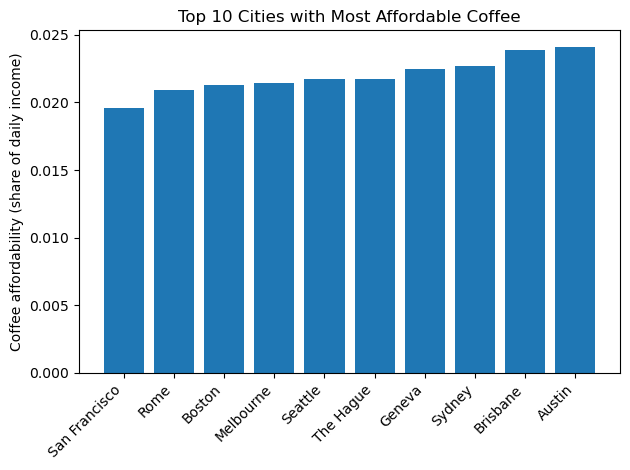

In [318]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    top10["City"],
    top10["coffee_affordability"]
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Top 10 Cities with Most Affordable Coffee")
plt.tight_layout()
plt.show()


Scatter plot: income vs coffee price
- shows why affordability differs across cities:
    - Bottom-right (high income, moderate price):
        darker colors → very affordable coffee
    - Top-left (low income, moderate price):
        lighter colors → less affordable coffee

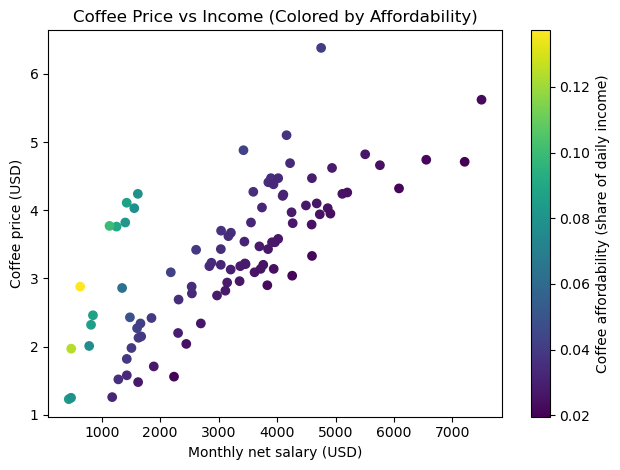

In [319]:
plt.figure()
plt.scatter(
    coffee_salary_df["monthly_net_salary"],
    coffee_salary_df["coffee_price_usd"],
    c=coffee_salary_df["coffee_affordability"]
)
plt.xlabel("Monthly net salary (USD)")
plt.ylabel("Coffee price (USD)")
plt.title("Coffee Price vs Income (Colored by Affordability)")
plt.colorbar(label="Coffee affordability (share of daily income)")
plt.tight_layout()
plt.show()


Cities with similar coffee prices differ strongly by income - coffee affordability is driven more by income differences than by coffee prices.

# Coffee affordability vs price environment
Goal of this step:
Check whether coffee affordability is related to:
- restaurant price levels
- market price levels

Scatter: restaurant prices vs coffee affordability:

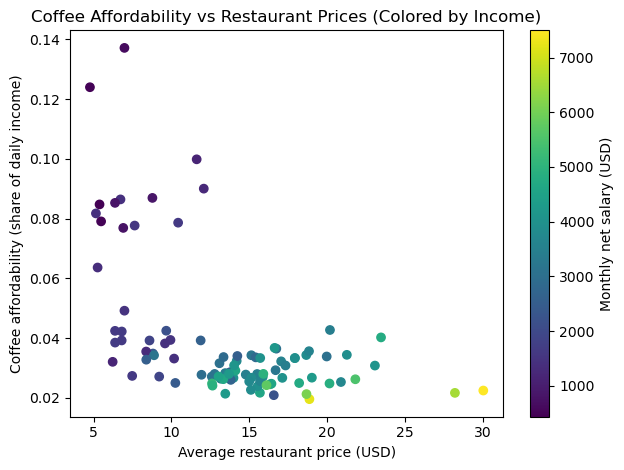

In [320]:
plt.figure()
plt.scatter(
    coffee_salary_df["restaurant_avg_usd"],
    coffee_salary_df["coffee_affordability"],
    c=coffee_salary_df["monthly_net_salary"]
)
plt.xlabel("Average restaurant price (USD)")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Coffee Affordability vs Restaurant Prices (Colored by Income)")
plt.colorbar(label="Monthly net salary (USD)")
plt.tight_layout()
plt.show()


High restaurant prices do not automatically mean coffee is unaffordable.
- cities with high restaurant prices often have low coffee affordability values
- coffee affordability is driven much more by income differences than by general price levels.

While average restaurant prices vary significantly across cities, they do not fully explain differences in coffee affordability. Cities with high restaurant prices often maintain low coffee affordability burdens due to higher income levels. In contrast, cities with lower restaurant prices can still experience poor coffee affordability when income levels are low. This indicates that income differences play a more important role than general price environments in determining coffee affordability

Creating a simple city-level price index
- averaging market and restaurant prices

In [321]:
coffee_salary_df["general_price_index"] = coffee_salary_df[
    ["restaurant_avg_usd", "market_avg_usd"]
].mean(axis=1) # average of restaurant and market prices as general price index

Expressing coffee prices relative to the simple price index

In [322]:
coffee_salary_df["coffee_relative_price"] = (
    coffee_salary_df["coffee_price_usd"] /
    coffee_salary_df["general_price_index"]
) # coffee price relative to general price level

In [323]:
coffee_salary_df[
    ["City", "Country", "coffee_price_usd",
     "general_price_index", "coffee_relative_price"]
].sort_values("coffee_relative_price").head(10) # top 10 cities with cheapest coffee relative to general price level


,City,Country,coffee_price_usd,general_price_index,coffee_relative_price
6,Rome,Italy,1.56,10.544107,0.147950
31,Coimbra,Portugal,1.58,6.539786,0.241598
85,Ottawa,Canada,3.14,12.894583,0.243513
7,Barcelona,Spain,2.20,8.687393,0.253241
30,Braga,Portugal,1.52,5.743071,0.264667
25,Madrid,Spain,2.34,8.710143,0.268652
27,Seville,Spain,1.71,6.310679,0.270969
73,Seattle,United States,4.74,17.005000,0.278742
10,Geneva,Switzerland,5.62,20.111107,0.279448
44,Antwerp,Belgium,3.43,12.256536,0.279851


In [324]:
coffee_salary_df[
    ["City", "Country", "coffee_price_usd",
     "general_price_index", "coffee_relative_price"]
].sort_values("coffee_relative_price", ascending=False).head(10) # bottom 10 cities with most expensive coffee relative to general price level

,City,Country,coffee_price_usd,general_price_index,coffee_relative_price
58,Guangzhou,China,3.82,3.996893,0.955742
57,Beijing,China,4.11,4.960036,0.828623
56,Shanghai,China,4.03,5.616786,0.717492
60,Kuala Lumpur,Malaysia,2.86,4.275464,0.668933
92,Lima,Peru,2.88,5.055679,0.569656
59,Shenzhen,China,4.24,7.645417,0.554581
37,Lublin,Poland,2.43,4.620429,0.525925
35,Szczecin,Poland,2.34,4.615714,0.506964
33,Thessaloniki,Greece,3.77,7.452821,0.505849
53,Dubai,United Arab Emirates,5.10,10.290321,0.495611


Scatter plot: relative price vs affordability

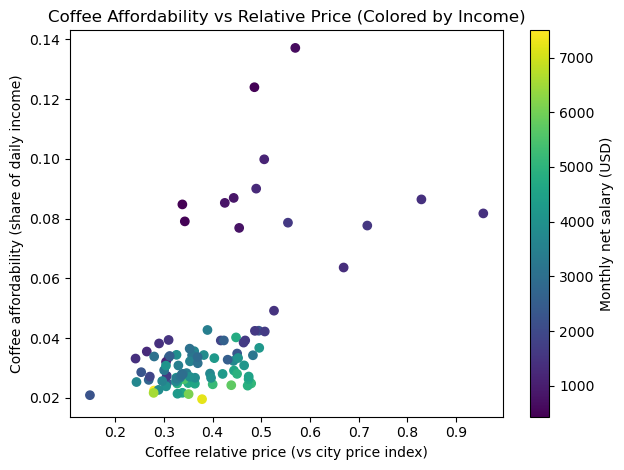

In [325]:
plt.figure()
plt.scatter(
    coffee_salary_df["coffee_relative_price"],
    coffee_salary_df["coffee_affordability"],
    c=coffee_salary_df["monthly_net_salary"]
)
plt.xlabel("Coffee relative price (vs city price index)")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Coffee Affordability vs Relative Price (Colored by Income)")
plt.colorbar(label="Monthly net salary (USD)")
plt.tight_layout()
plt.show()


Normalizing coffee prices by the general price level of a city does not eliminate affordability differences. Cities with similar relative coffee prices often exhibit vastly different affordability outcomes. The results indicate that income disparities, rather than local price structures alone, are the dominant driver of coffee affordability across cities.

# Country-level spatial view of coffee affordability

In [326]:
country_affordability = (
    coffee_salary_df
    .groupby("Country")["coffee_affordability"]
    .mean()
    .reset_index()
    .sort_values("coffee_affordability")
) # aggregating to country level

In [327]:
country_affordability.head()

,Country,coffee_affordability
17,Italy,0.020935
30,Switzerland,0.022490
1,Australia,0.024273
33,United Kingdom,0.024991
34,United States,0.026546


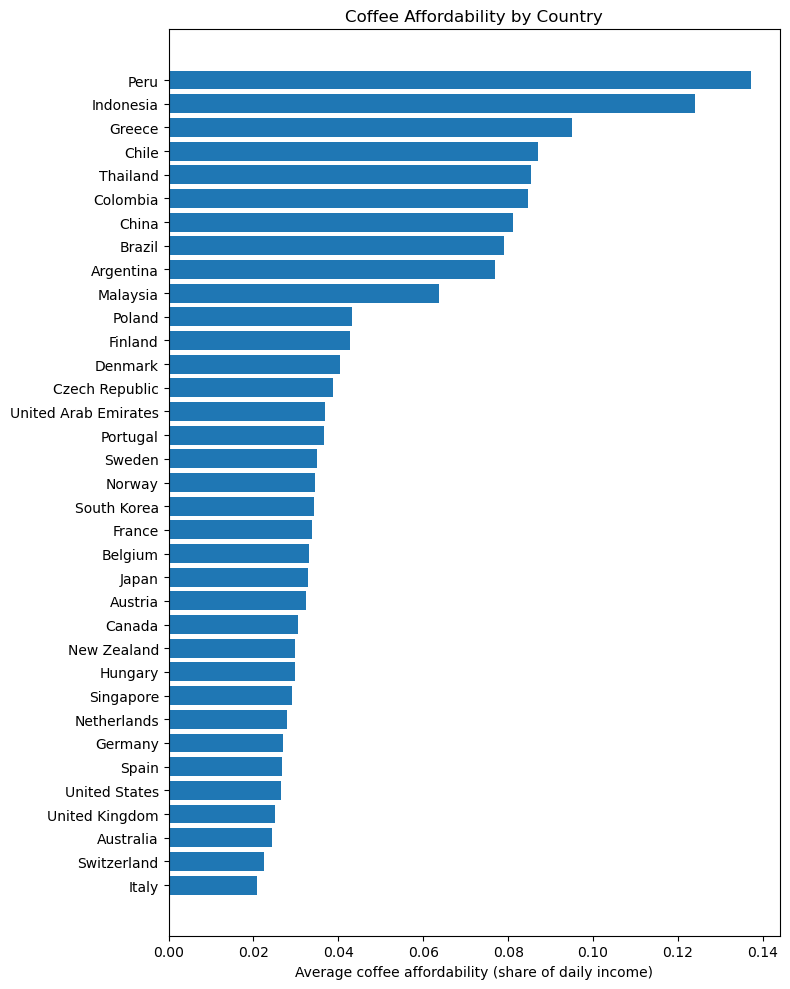

In [328]:
plt.figure(figsize=(8, 10))
plt.barh(
    country_affordability["Country"],
    country_affordability["coffee_affordability"]
)
plt.xlabel("Average coffee affordability (share of daily income)")
plt.title("Coffee Affordability by Country")
plt.tight_layout()
plt.show()


# “Best cities for caffeine-addicted students” ranking

For a student, a “good” coffee city means:
- Coffee is affordable (low coffee_affordability)
- Daily living is not extremely expensive
- Coffee is not unusually overpriced relative to other goods

Creating a composite student score:
- summarizes affordability, relative price levels, and lifestyle costs into a single indicator

In [ ]:
student_score_df = coffee_salary_df.copy()

student_score_df["student_score"] = (
    student_score_df["coffee_affordability"] * 0.5 +
    student_score_df["coffee_relative_price"] * 0.3 +
    (student_score_df["restaurant_avg_usd"] / student_score_df["restaurant_avg_usd"].max()) * 0.2
)


In [330]:
best_cities = (
    student_score_df
    .sort_values("student_score")
    [["City", "Country", "student_score", "coffee_affordability", "coffee_relative_price"]]
) # ranking cities for students based on composite score


In [331]:
best_cities.head(10) # top 10 best cities for coffee-loving students

,City,Country,student_score,coffee_affordability,coffee_relative_price
39,Debrecen,Hungary,0.148819,0.032097,0.304214
30,Braga,Portugal,0.153009,0.035544,0.264667
38,Budapest,Hungary,0.155252,0.027386,0.305675
27,Seville,Spain,0.156275,0.027153,0.270969
31,Coimbra,Portugal,0.156852,0.033190,0.241598
6,Rome,Italy,0.165269,0.020935,0.147950
29,Porto,Portugal,0.169983,0.038250,0.289918
26,Valencia,Spain,0.172702,0.025027,0.306259
28,Lisbon,Portugal,0.178784,0.039415,0.309503
94,Rio de Janeiro,Brazil,0.178955,0.079111,0.342784


# Coffee survival index

In [339]:
monthly_coffee_budget = 30.0

coffee_salary_df["coffee_survival_days_30"] = (
    monthly_coffee_budget / coffee_salary_df["coffee_price_usd"]
) # coffee survival days for a single monthly budget (e.g. 30 USD)

In [340]:
coffee_salary_df["coffee_survival_days_30"].describe()

count    95.000000
mean     10.149869
std       4.185329
min       4.702194
25%       7.344040
50%       8.771930
75%      11.030754
max      24.390244
Name: coffee_survival_days_30, dtype: float64

In [341]:
coffee_salary_df[["City","Country","coffee_price_usd","coffee_survival_days_30"]].sort_values(
    "coffee_survival_days_30", ascending=False).head(10) # top 10 cities for coffee survival days

,City,Country,coffee_price_usd,coffee_survival_days_30
93,Bogota,Colombia,1.23,24.390244
94,Rio de Janeiro,Brazil,1.25,24.000000
39,Debrecen,Hungary,1.26,23.809524
38,Budapest,Hungary,1.48,20.270270
30,Braga,Portugal,1.52,19.736842
6,Rome,Italy,1.56,19.230769
31,Coimbra,Portugal,1.58,18.987342
27,Seville,Spain,1.71,17.543860
29,Porto,Portugal,1.82,16.483516
62,Jakarta,Indonesia,1.97,15.228426


In [342]:
coffee_salary_df[
    ["City", "Country", "coffee_price_usd", "coffee_survival_days_30"]
].sort_values("coffee_survival_days_30").head(10) # bottom 10 cities for coffee survival days

,City,Country,coffee_price_usd,coffee_survival_days_30
11,Copenhagen,Denmark,6.38,4.702194
10,Geneva,Switzerland,5.62,5.338078
53,Dubai,United Arab Emirates,5.10,5.882353
21,Helsinki,Finland,4.88,6.147541
1,New York,United States,4.82,6.224066
73,Seattle,United States,4.74,6.329114
72,San Francisco,United States,4.71,6.369427
2,Los Angeles,United States,4.69,6.396588
75,San Jose,United States,4.66,6.437768
77,Denver,United States,4.62,6.493506


In [344]:
top10_survival = (
    coffee_salary_df
    .sort_values("coffee_survival_days_30", ascending=False)
    .head(10)
)

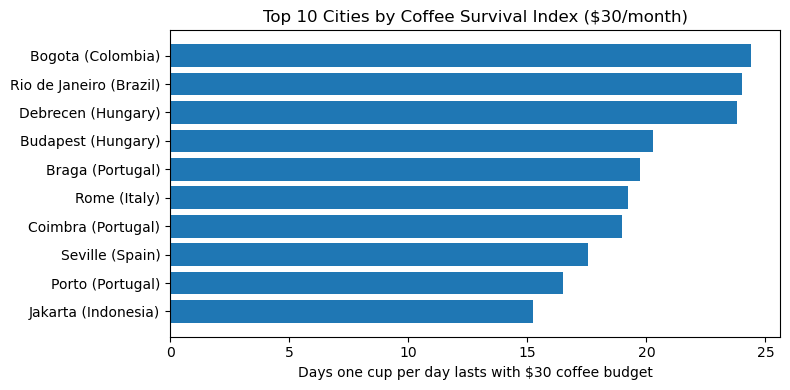

In [345]:
plt.figure(figsize=(8, 4))
plt.barh(
    top10_survival["City"] + " (" + top10_survival["Country"] + ")",
    top10_survival["coffee_survival_days_30"]
)
plt.xlabel("Days one cup per day lasts with $30 coffee budget")
plt.title("Top 10 Cities by Coffee Survival Index ($30/month)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Link Coffee Survival Index to income & prices

Scatter: Survival days vs income (colored by relative price)

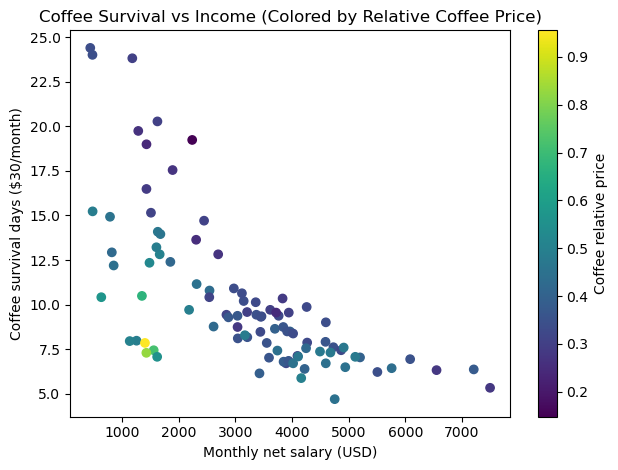

In [346]:
plt.figure()
plt.scatter(
    coffee_salary_df["monthly_net_salary"],
    coffee_salary_df["coffee_survival_days_30"],
    c=coffee_salary_df["coffee_relative_price"]
)
plt.xlabel("Monthly net salary (USD)")
plt.ylabel("Coffee survival days ($30/month)")
plt.title("Coffee Survival vs Income (Colored by Relative Coffee Price)")
plt.colorbar(label="Coffee relative price")
plt.tight_layout()
plt.show()

Although higher-income cities exhibit lower coffee survival days, this reflects higher absolute coffee prices rather than lower affordability; income-based affordability metrics show the opposite pattern.

Survival index for multiple budgets:
- robusedness check

In [352]:
for budget in [20, 30, 50]:
    col = f"coffee_survival_days_{budget}"
    coffee_salary_df[col] = budget / coffee_salary_df["coffee_price_usd"]

coffee_salary_df[
    ["City","coffee_price_usd","coffee_survival_days_20","coffee_survival_days_30","coffee_survival_days_50"]
].head()


,City,coffee_price_usd,coffee_survival_days_20,coffee_survival_days_30,coffee_survival_days_50
0,London,3.94,5.076142,7.614213,12.690355
1,New York,4.82,4.149378,6.224066,10.373444
2,Los Angeles,4.69,4.264392,6.396588,10.660981
3,Chicago,4.26,4.694836,7.042254,11.737089
4,Toronto,3.21,6.230530,9.345794,15.576324


In [353]:
top10_baseline = (
    coffee_salary_df
    .sort_values("coffee_survival_days_30", ascending=False)
    .head(10)
) # select top 10 based on $30 budget baseline

In [354]:
top10_baseline[
    ["City", "Country", "coffee_survival_days_20", "coffee_survival_days_30", "coffee_survival_days_50"]
]

,City,Country,coffee_survival_days_20,coffee_survival_days_30,coffee_survival_days_50
93,Bogota,Colombia,16.260163,24.390244,40.650407
94,Rio de Janeiro,Brazil,16.000000,24.000000,40.000000
39,Debrecen,Hungary,15.873016,23.809524,39.682540
38,Budapest,Hungary,13.513514,20.270270,33.783784
30,Braga,Portugal,13.157895,19.736842,32.894737
6,Rome,Italy,12.820513,19.230769,32.051282
31,Coimbra,Portugal,12.658228,18.987342,31.645570
27,Seville,Spain,11.695906,17.543860,29.239766
29,Porto,Portugal,10.989011,16.483516,27.472527
62,Jakarta,Indonesia,10.152284,15.228426,25.380711


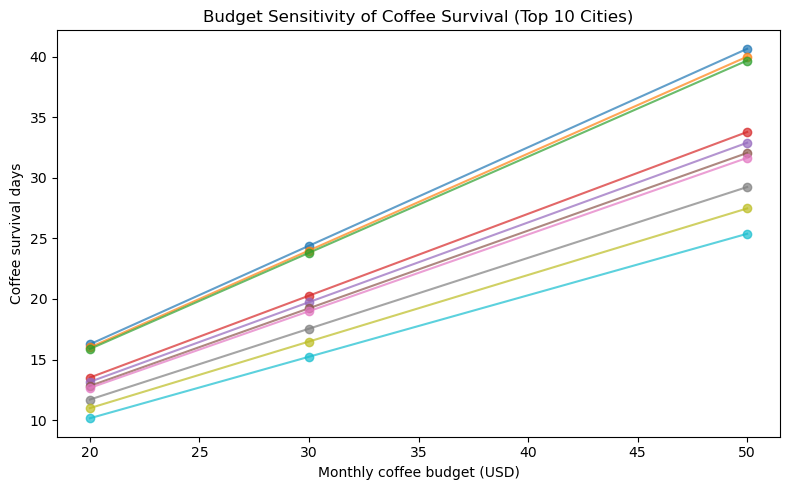

In [355]:
plt.figure(figsize=(8, 5))

for _, row in top10_baseline.iterrows():
    plt.plot(
        [20, 30, 50],
        [
            row["coffee_survival_days_20"],
            row["coffee_survival_days_30"],
            row["coffee_survival_days_50"]
        ],
        marker="o",
        alpha=0.7
    )

plt.xlabel("Monthly coffee budget (USD)")
plt.ylabel("Coffee survival days")
plt.title("Budget Sensitivity of Coffee Survival (Top 10 Cities)")
plt.tight_layout()
plt.show()


The relative differences between cities remain stable across different coffee budgets, indicating that the Coffee Survival Index is robust to reasonable student budget assumptions.